In [123]:
# Dataset paths 
TRAIN_2F_NORM = "../Dados_Normalizados_2Features/TrainingData_2F_Norm.txt"
TEST_2F_NORM = "../Dados_Normalizados_2Features/TestingData_2F_Norm.txt"

TRAIN_11F_NORM = "../Dados_Normalizados_11Features/TrainingData_11F_Norm.txt"
TEST_11F_NORM = "../Dados_Normalizados_11Features/TestingData_11F_Norm.txt"

TRAIN_2F_ORI = "../Dados_Originais_2Features/TrainingData_2F_Original.txt"
TEST_2F_ORI = "../Dados_Originais_2Features/TestingData_2F_Original.txt"

TRAIN_11F_ORI = "../Dados_Originais_11Features/TrainingData_11F_Original.txt"
TEST_11F_ORI = "../Dados_Originais_11Features/TestingData_11F_Original.txt"

In [124]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

K_NEIGHBORS = 5

In [163]:
import pandas as pd

print("DADOS ORIGINAIS: 2 FEATURES")

# Load the data from file
training_data = pd.read_csv(TRAIN_2F_ORI, delimiter='\t', header=0, names=['ID', 'total.sulfur.dioxide', 'citric.acid', 'class'])
test_data = pd.read_csv(TEST_2F_ORI, delimiter='\t', header=0, names=['ID', 'total.sulfur.dioxide', 'citric.acid', 'class'])

# Split the data into X and Y
X_train = training_data[['total.sulfur.dioxide', 'citric.acid']]
Y_train = training_data['class']

X_test = test_data[['total.sulfur.dioxide', 'citric.acid']]
Y_test = test_data['class']

for k in range(1, 8, 2):    
    # Create the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the data
    knn.fit(X_train, Y_train)

    print(f" Expected: {Y_test.values}")
    print(f" Predicted: {knn.predict(X_test)}")
    print(f" Accuracy for k = {k}: {knn.score(X_test, Y_test)}")
    print("")


DADOS ORIGINAIS: 2 FEATURES
 Expected: [0 0 1 1]
 Predicted: [0 0 1 0]
 Accuracy for k = 1: 0.75

 Expected: [0 0 1 1]
 Predicted: [1 0 1 0]
 Accuracy for k = 3: 0.5

 Expected: [0 0 1 1]
 Predicted: [1 1 1 0]
 Accuracy for k = 5: 0.25

 Expected: [0 0 1 1]
 Predicted: [1 1 1 0]
 Accuracy for k = 7: 0.25



In [184]:
import pandas as pd

for row in X_test.iterrows():
    # Discover the k closest neighbors
    distances, indices = knn.kneighbors([row], K_NEIGHBORS, True)
    print(f"Distances: {distances}")
    print(f"Indices: {indices+1}")

print(X_train)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1, 2) + inhomogeneous part.

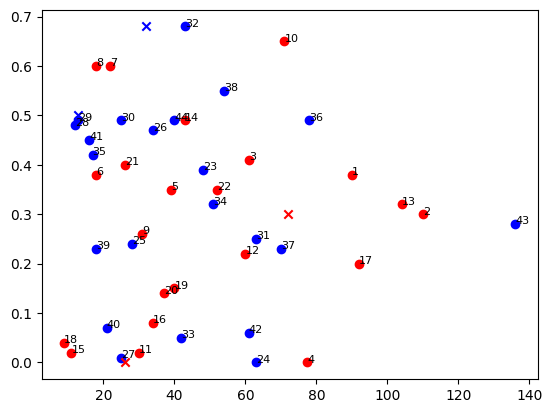

In [127]:
plt.figure()
plt.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], marker='o', color='blue')
plt.scatter(X_train[Y_train == 0, 0], X_train[Y_train == 0, 1], marker='o', color='red')
plt.scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], marker='x', color='blue')
plt.scatter(X_test[Y_test == 0, 0], X_test[Y_test == 0, 1], marker='x', color='red')

# Add index of each point
for i, txt in enumerate(range(1, len(X_train)+ 1)):
    plt.text(X_train[i, 0] if i < len(X_train) else X_test[i - len(X_train), 0] + 0.01,
             X_train[i, 1] if i < len(X_train) else X_test[i - len(X_train), 1] + 0.01,
             txt, fontsize=8)

plt.show()


In [128]:
# Load the data from file
training_data = np.genfromtxt(TRAIN_2F_NORM, delimiter='\t', skip_header=1, usecols=(0,1,2,3))
test_data = np.genfromtxt(TEST_2F_NORM, delimiter='\t', skip_header=1, usecols=(0,1,2,3))

# Split the data into X and Y
X_train = training_data[:, 1:-1]
Y_train = training_data[:, -1]

X_test = test_data[:, 1:-1]
Y_test = test_data[:, -1]    

print("DADOS NORMALIZADOS: 2 FEATURES")
for k in range(1, 8, 2):    
    # Create the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the data
    knn.fit(X_train, Y_train)

    print(f" Accuracy for k = {k}: {knn.score(X_test, Y_test)}")


DADOS NORMALIZADOS: 2 FEATURES
 Accuracy for k = 1: 0.5
 Accuracy for k = 3: 0.25
 Accuracy for k = 5: 0.75
 Accuracy for k = 7: 1.0


In [129]:
# Discover the k closest neighbors
for i in X_test:
    kneighbors = knn.kneighbors([i], K_NEIGHBORS, True)
    print(kneighbors)

(array([[0.017     , 0.04244997, 0.11049434, 0.12151132, 0.13376472]]), array([[26, 10, 39, 14, 15]]))
(array([[0.1018332 , 0.10423531, 0.15008331, 0.1677051 , 0.17356555]]), array([[30, 36, 11, 33, 21]]))
(array([[0.014     , 0.02983287, 0.076844  , 0.09602604, 0.12129716]]), array([[28, 27, 40, 29, 34]]))
(array([[0.087     , 0.14200352, 0.16131956, 0.25770138, 0.28436948]]), array([[31,  6,  7, 37, 29]]))


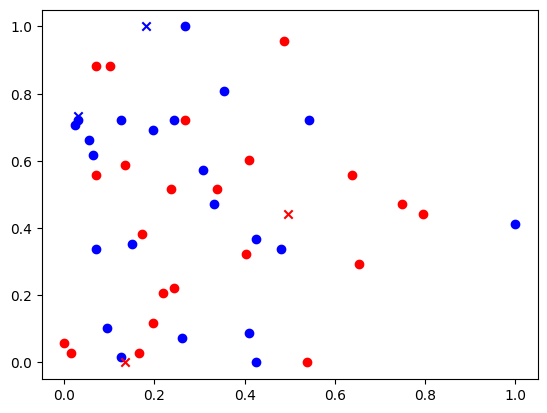

In [130]:
plt.figure()
plt.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], marker='o', color='blue')
plt.scatter(X_train[Y_train == 0, 0], X_train[Y_train == 0, 1], marker='o', color='red')
plt.scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], marker='x', color='blue')
plt.scatter(X_test[Y_test == 0, 0], X_test[Y_test == 0, 1], marker='x', color='red')

plt.show()

In [131]:
print("DADOS ORIGINAIS: 11 FEATURES")

# Load the data from file
training_data = np.genfromtxt(TRAIN_11F_ORI, delimiter='\t', skip_header=1)
test_data = np.genfromtxt(TEST_11F_ORI, delimiter='\t', skip_header=1)

# Split the data into X and Y
X_train = training_data[:, 1:-1]
Y_train = training_data[:, -1]

X_test = test_data[:, 1:-1]
Y_test = test_data[:, -1]

for k in range(1, 8, 2):    
    # Create the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the data
    knn.fit(X_train, Y_train)

    print(f" Accuracy for k = {k}: {knn.score(X_test, Y_test)}")


DADOS ORIGINAIS: 11 FEATURES
 Accuracy for k = 1: 0.5
 Accuracy for k = 3: 0.25
 Accuracy for k = 5: 0.25
 Accuracy for k = 7: 0.5


In [132]:
# Discover the k closest neighbors
for i in X_test:
    kneighbors = knn.kneighbors([i], K_NEIGHBORS, True)
    print(kneighbors)

(array([[5.12438757, 5.52404359, 5.63804537, 6.17604167, 6.61224761]]), array([[10, 39, 24, 26, 20]]))
(array([[10.89593964, 13.05666566, 13.81646631, 14.4355258 , 16.56097611]]), array([[30, 23, 41, 11, 35]]))
(array([[1.51895568, 2.23226937, 3.3951593 , 5.17555498, 5.42146955]]), array([[28, 27, 40, 14, 34]]))
(array([[4.70147523, 4.73784783, 5.18338779, 5.57357346, 5.73237054]]), array([[10, 15,  8, 19, 24]]))


In [133]:
print("DADOS NORMALIZADOS: 11 FEATURES")

# Load the data from file
training_data = np.genfromtxt(TRAIN_11F_NORM, delimiter='\t', skip_header=1)
test_data = np.genfromtxt(TEST_11F_NORM, delimiter='\t', skip_header=1)

# Split the data into X and Y
X_train = training_data[:, 1:-1]
Y_train = training_data[:, -1]

X_test = test_data[:, 1:-1]
Y_test = test_data[:, -1]

for k in range(1, 8, 2):    
    # Create the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the data
    knn.fit(X_train, Y_train)

    print(f" Accuracy for k = {k}: {knn.score(X_test, Y_test)}")


DADOS NORMALIZADOS: 11 FEATURES
 Accuracy for k = 1: 0.75
 Accuracy for k = 3: 0.75
 Accuracy for k = 5: 0.75
 Accuracy for k = 7: 0.75


In [134]:
# Discover the k closest neighbors
for i in X_test:
    kneighbors = knn.kneighbors([i], K_NEIGHBORS, True)
    print(kneighbors)

(array([[0.26608457, 0.27485451, 0.40997439, 0.44683106, 0.45129924]]), array([[15, 26, 18, 19, 14]]))
(array([[0.29797987, 0.52213025, 0.55031446, 0.56891476, 0.57427607]]), array([[30,  4, 21, 18, 33]]))
(array([[0.30297195, 0.38554896, 0.46861285, 0.49392914, 0.51597384]]), array([[25, 27,  6, 28, 40]]))
(array([[1.92418424, 2.04533371, 2.04690547, 2.46220227, 2.49820516]]), array([[29,  0,  7,  6,  5]]))
